In \[1\]:

    # Code using keras
    # TensorFlow and tf.keras
    import tensorflow as tf
    from tensorflow import keras
    from keras import initializers

    # Helper libraries
    import numpy as np
    import matplotlib.pyplot as plt

    print(tf.__version__)

    Using TensorFlow backend.

    2.0.0

In \[2\]:

    # Load dataset
    fashion_mnist = keras.datasets.fashion_mnist

    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In \[3\]:

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In \[4\]:

    train_images.shape

Out\[4\]:

    (60000, 28, 28)

In \[5\]:

    train_labels

Out\[5\]:

    array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In \[6\]:

    test_images.shape

Out\[6\]:

    (10000, 28, 28)

In \[7\]:

    plt.figure()
    plt.imshow(train_images[0])
    plt.colorbar()
    plt.grid(False)
    plt.show()

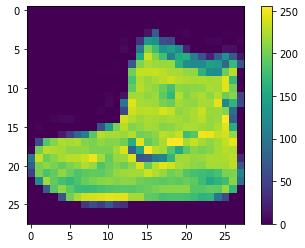

In \[8\]:

    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

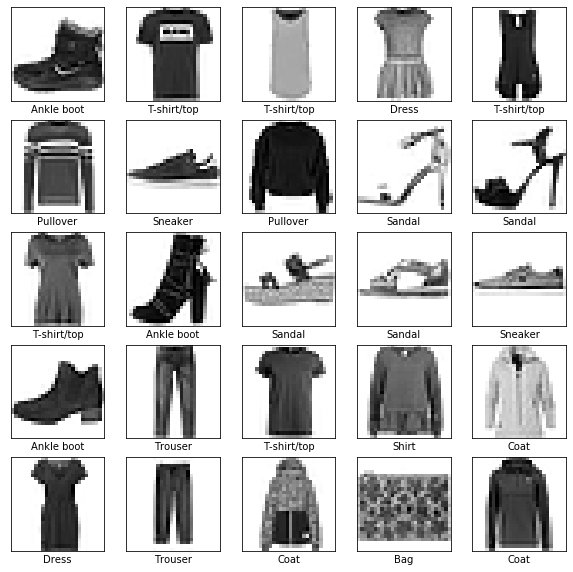

In \[9\]:

    num_pixels = train_images.shape[1] * train_images.shape[2]   #28*28 = 784
    X_train = train_images.reshape(train_images.shape[0], num_pixels)
    X_test = test_images.reshape(test_images.shape[0], num_pixels)

    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255


    Y_test = test_labels 
    from keras.utils import np_utils
    # one hot encode outputs
    y_train = np_utils.to_categorical(train_labels )
    y_test = np_utils.to_categorical(test_labels )


    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras import optimizers
    import tensorflow as tf



    hidden_nodes = 128
    num_classes = y_test.shape[1]

    #tf.random.normal(shape=(hidden_nodes,num_pixels)
    def baseline_model():
        # create model
        model = Sequential()
        #model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
        #model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
        #model.add(Dense(num_classes,  kernel_initializer='normal',activation='softmax'))
        model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
        model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
        model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
        sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
        return model

In \[10\]:

    model = baseline_model()
    # Fit the model
    final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose= 0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    Train on 48000 samples, validate on 12000 samples
    Epoch 1/20
    48000/48000 [==============================] - 3s 53us/sample - loss: 1.7964 - accuracy: 0.4778 - val_loss: 1.2062 - val_accuracy: 0.6482
    Epoch 2/20
    48000/48000 [==============================] - 2s 32us/sample - loss: 0.9745 - accuracy: 0.6763 - val_loss: 0.8181 - val_accuracy: 0.7097
    Epoch 3/20
    48000/48000 [==============================] - 2s 35us/sample - loss: 0.7669 - accuracy: 0.7251 - val_loss: 0.7059 - val_accuracy: 0.7575
    Epoch 4/20
    48000/48000 [==============================] - 2s 38us/sample - loss: 0.6817 - accuracy: 0.7614 - val_loss: 0.6449 - val_accuracy: 0.7772
    Epoch 5/20
    48000/48000 [==============================] - 2s 31us/sample - loss: 0.6260 - accuracy: 0.7836 - val_loss: 0.5996 - val_accuracy: 0.7915
    Epoch 6/20
    48000/48000 [==============================] - 2s 42us/sample - loss: 0.5855 - accuracy: 0.7993 - val_loss: 0.5699 - val_accuracy: 0.8002
    Epoch 7/20
    48000/48000 [==============================] - 2s 35us/sample - loss: 0.5569 - accuracy: 0.8086 - val_loss: 0.5418 - val_accuracy: 0.8138
    Epoch 8/20
    48000/48000 [==============================] - 1s 31us/sample - loss: 0.5341 - accuracy: 0.8160 - val_loss: 0.5281 - val_accuracy: 0.8178
    Epoch 9/20
    48000/48000 [==============================] - 2s 32us/sample - loss: 0.5164 - accuracy: 0.8211 - val_loss: 0.5187 - val_accuracy: 0.8169
    Epoch 10/20
    48000/48000 [==============================] - 1s 31us/sample - loss: 0.5032 - accuracy: 0.8256 - val_loss: 0.5033 - val_accuracy: 0.8193
    Epoch 11/20
    48000/48000 [==============================] - 1s 31us/sample - loss: 0.4916 - accuracy: 0.8291 - val_loss: 0.5006 - val_accuracy: 0.8193
    Epoch 12/20
    48000/48000 [==============================] - 2s 33us/sample - loss: 0.4829 - accuracy: 0.8323 - val_loss: 0.4803 - val_accuracy: 0.8313
    Epoch 13/20
    48000/48000 [==============================] - 2s 35us/sample - loss: 0.4746 - accuracy: 0.8345 - val_loss: 0.4775 - val_accuracy: 0.8288
    Epoch 14/20
    48000/48000 [==============================] - 2s 36us/sample - loss: 0.4669 - accuracy: 0.8370 - val_loss: 0.4681 - val_accuracy: 0.8328
    Epoch 15/20
    48000/48000 [==============================] - 1s 31us/sample - loss: 0.4612 - accuracy: 0.8391 - val_loss: 0.4679 - val_accuracy: 0.8340
    Epoch 16/20
    48000/48000 [==============================] - 2s 32us/sample - loss: 0.4548 - accuracy: 0.8422 - val_loss: 0.4583 - val_accuracy: 0.8402
    Epoch 17/20
    48000/48000 [==============================] - 2s 32us/sample - loss: 0.4491 - accuracy: 0.8438 - val_loss: 0.4555 - val_accuracy: 0.8413
    Epoch 18/20
    48000/48000 [==============================] - 1s 31us/sample - loss: 0.4440 - accuracy: 0.8448 - val_loss: 0.4493 - val_accuracy: 0.8428
    Epoch 19/20
    48000/48000 [==============================] - 1s 30us/sample - loss: 0.4384 - accuracy: 0.8478 - val_loss: 0.4445 - val_accuracy: 0.8431
    Epoch 20/20
    48000/48000 [==============================] - 2s 34us/sample - loss: 0.4345 - accuracy: 0.8495 - val_loss: 0.4416 - val_accuracy: 0.8437
    Accuracy: 83.47%

In \[11\]:

    predictions = model.predict(X_test)
    predictions[0]

Out\[11\]:

    array([1.0361678e-05, 1.0708000e-07, 2.0258556e-06, 8.8349307e-06,
           4.9331757e-06, 1.0521139e-01, 1.9202058e-05, 1.7989491e-01,
           1.4793016e-03, 7.1336895e-01], dtype=float32)

In \[13\]:

    def plot_image(i, predictions_array, true_label, img):
        predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
      
        plt.imshow(img, cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions_array)
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
      
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

    def plot_value_array(i, predictions_array, true_label):
        predictions_array, true_label = predictions_array[i], true_label[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1]) 
        predicted_label = np.argmax(predictions_array)
     
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

In \[14\]:

    i = 12
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, Y_test, test_images)
    plt.show()
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  Y_test)
    plt.show()

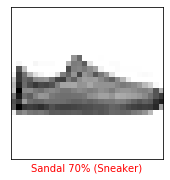

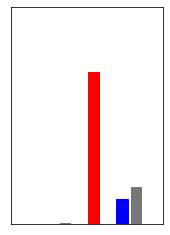

In \[15\]:

    plt.subplot(2,1,1)
    plt.plot(final_model.history['accuracy'])
    plt.plot(final_model.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(2,1,2)
    plt.plot(final_model.history['loss'])
    plt.plot(final_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()

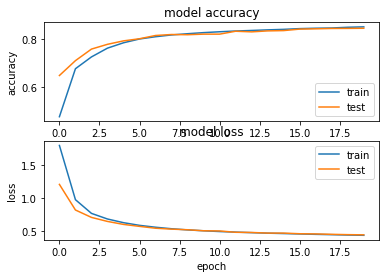

In \[ \]: